In [1]:
import os
os.chdir('../')

In [2]:
import torch
import numpy as np
from src.dataset.utils import fgaid_to_fganame
from src.utils.reproducibility import make_reproducible

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

%load_ext autoreload
%autoreload 2

In [3]:
# Fix random state to make results reproducible
make_reproducible(random_seed=0)

id_to_action_name_dict = fgaid_to_fganame(
    fga_map_file="/Users/artemmerinov/data/holoassist/fine_grained_actions_map.txt"
)

Making reproducible on seed 0


In [4]:
from collections import Counter
import pandas as pd

labels = torch.load(
    # f="tsne_artefacts/train/TSN_InceptionV3_SS1_bs32_ns16_ep15_labels.pt", 
    # f="tsne_artefacts/train/TSM_InceptionV3_SS1_bs32_ns16_ep15_labels.pt", 
    f="tsne_artefacts/train/GSM_InceptionV3_SS1_bs32_ns16_ep15_labels.pt", 
    # f="tsne_artefacts/train/GSF_InceptionV3_SS1_bs32_ns16_ep15_labels.pt", 
    map_location=torch.device('cpu')
)
features = torch.load(
    # f="tsne_artefacts/train/TSN_InceptionV3_SS1_bs32_ns16_ep15_features.pt",
    # f="tsne_artefacts/train/TSM_InceptionV3_SS1_bs32_ns16_ep15_features.pt", 
    f="tsne_artefacts/train/GSM_InceptionV3_SS1_bs32_ns16_ep15_features.pt", 
    # f="tsne_artefacts/train/GSF_InceptionV3_SS1_bs32_ns16_ep15_features.pt",  
    map_location=torch.device('cpu')
)

labels = labels.numpy()
features = features.numpy()

Counter(labels).most_common(10)

[(1223, 4708),
 (1226, 4052),
 (1224, 3758),
 (1239, 3409),
 (1213, 2396),
 (1215, 2250),
 (1230, 2136),
 (22, 1867),
 (258, 1864),
 (1240, 1751)]

In [5]:
features.shape

(124759, 2048)

In [6]:
id_to_action_name_dict[22]

'grab-leg'

In [7]:
top10_labels = [label for label, cnt in Counter(labels).most_common(200)]
print(np.array(top10_labels))

[1223 1226 1224 1239 1213 1215 1230   22  258 1240   41   37   32 1211
 1273 1220   39 1222   38   45 1242 1250 1276 1216  742 1238 1244  257
 1247 1209 1460 1241 1296  424  477 1249 1227   86  634  121 1275 1246
 1257 1263 1208    4    6  263 1294 1252 1243 1270 1267  480   31  483
 1212   14   96   88 1303   94  316 1233   42   25  582 1235  209 1245
  502    2 1259 1511  741   12   30 1218 1254  125  205 1225   27 1232
  320  503  104  572  193    7   90  108 1228 1229   91   89 1256   52
    8  144  313 1221  411 1271  740 1283 1307  133  318   85 1329    5
 1328  141 1262  321 1301 1290   29  648  106   10  128 1459 1279  314
 1338  649  638   19   62  312 1293  923 1234  109  178  139  319  452
  170  138  134  190 1327  262 1302 1288 1266 1287  843 1285 1415 1292
 1452 1333   56  189 1255  408  328 1080 1258  325 1446   26  113 1248
   97 1268  107 1312 1315   78  317  169 1042  132  111  484  349   47
  154  910 1078 1361  130  114  182  418 1456 1300 1309 1272 1214 1413
  651 

In [8]:
top10_labels = [

    # 1242, #insert-hexagonal_wrench
    # 1244, #withdraw-hexagonal_wrench

    408, # open-copy_gate
    418, # close-copy_gate
    
    325, # open-cartridge_gate
    328, # close-cartridge_gate

    1327,  # withdraw-ink_cartridge
    1328,  # place-ink_cartridge
    
    # 582, #grab-ink_cartridge
    # 1328, #place-ink_cartridge
    
    325, # open-cartridge_gate
    328, # close-cartridge_gate

    # 87, # disassemble-joy_con_controller
    # 91, # assemble-joy_con_controller

    94, # withdraw-joy_con_controller
    193, # insert-joy_con_controller

    # 307, # assemble-capsule_container,
    # 639, # disassemble-capsule_container

    # 861, # open-wheel_box
    # 232, # close-wheel_box

    6, # open-battery_door
    14, # close-battery_door

    96, # grab-nintendo_switch
    90, # place-nintendo_switch

    1571, #disassemble-seat
    1418,# assemble-seat

    # 1843, # screw-washer,
    # 1691, # unscrew-washer

    # 334, #screw-mounting_peg
    # 335, #unscrew-mounting_peg
    
    # 484, #screw-bolt
    # 497, #unscrew-bolt

    # 1291, # unscrew-gopro
    # 776, # screw-gopro

    # 1270, # unscrew-hex_nut
    # 1303, # screw-hex_nut

    # 1402,# grab-water_kettle
    # 1405,# place-water_kettle

    # 137, # insert-coffee_capsule
    # 607, # withdraw-coffee_capsule

    1222, # grab-allen_wrench
    1238, # place-allen_wrench

    # 1247, # grab-screwdriver
    # 1276, # withdraw-screwdriver

    # 410, #assemble-screw
    # 1275, #disassemble-screw
    
    1257, # place-bracket
    1263, # grab-bracket

    # 785, # assemble-battery_door,
    # 1741, # disassemble-battery_door

    # 363, # close-sd_card
    # 456, # open-sd_card

    # 1511, # screw-wheel
    # 1243, # unscrew-wheel

    # 1218, # grab-nightstand
    # 1221, # place-nightstand

    # 130, # open-lid
    # 132, # close-lid

    # 97, # open-kickstand
    # 103, # close-kickstand
]

In [9]:
# List to store all indices for top labels
all_indices = []

# Find indices for each top label and extend the list
for label in top10_labels:
    indices = np.where(labels == label)[0]
    all_indices.extend(indices)

all_indices = np.array(all_indices)

In [10]:
selected_labels = labels[all_indices]
selected_features = features[all_indices]

In [11]:
len(selected_labels), len(selected_features)

(6482, 6482)

In [12]:
from sklearn.manifold import TSNE
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(selected_features)

In [14]:
selected_features.shape

(6482, 2048)

In [15]:
tsne = TSNE(
    n_components=2, 
    perplexity=30,
    learning_rate='auto',
    init='pca',
    verbose=0,
    n_iter=1500,
    random_state=0,
    n_jobs=-1
)
tsne_results = tsne.fit_transform(X)

/Users/artemmerinov/PycharmProjects/holoassist-challenge/.venv/lib/python3.10/site-packages/threadpoolctl.py:1223: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


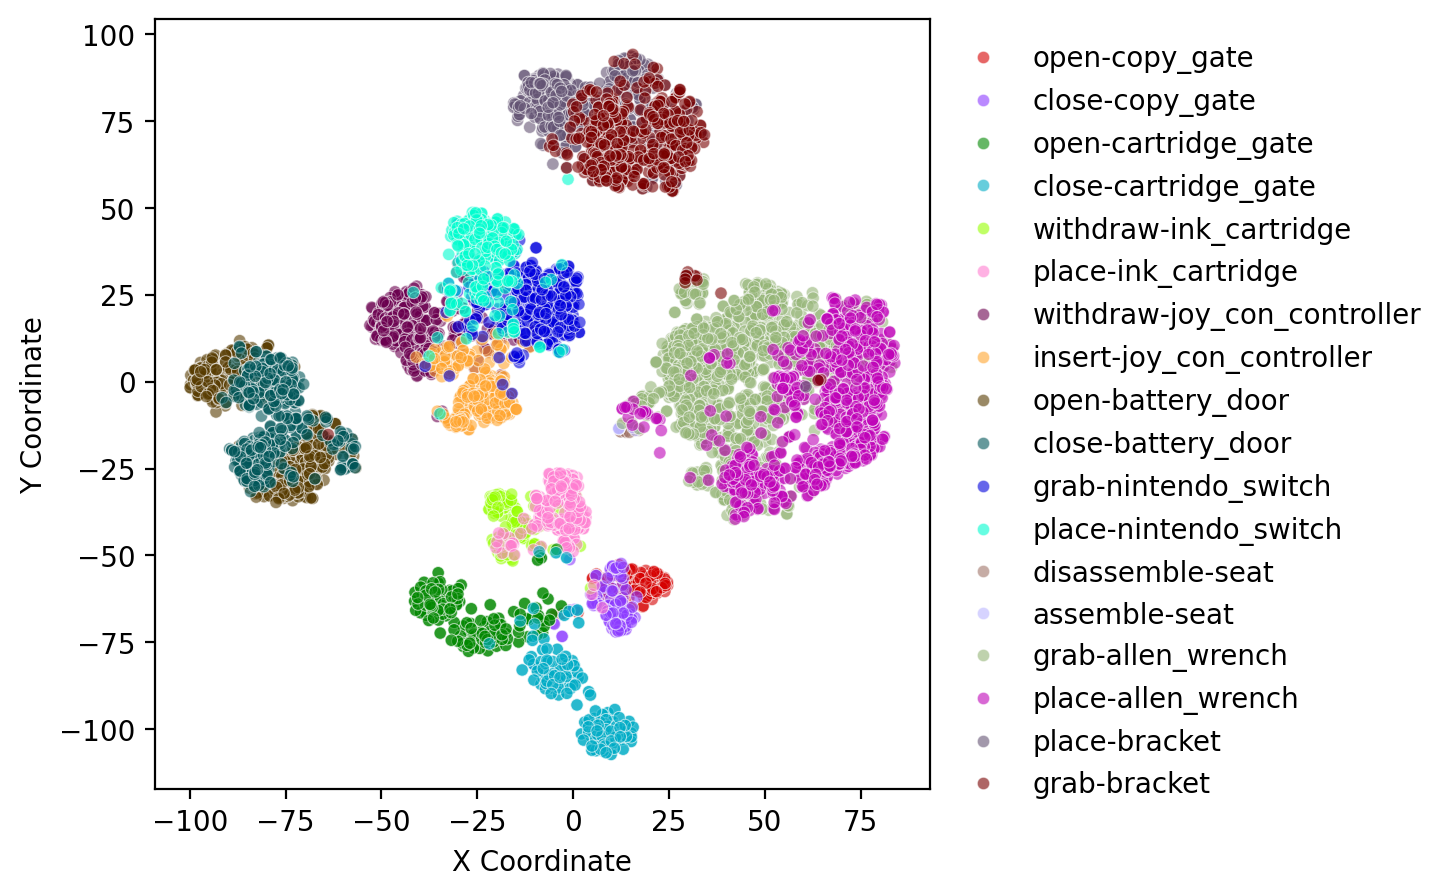

In [16]:
tsne_df = pd.DataFrame()
tsne_df["tsne_2d_one"] = tsne_results[:, 0]
tsne_df["tsne_2d_two"] = tsne_results[:, 1]
tsne_df["cluster"] = [id_to_action_name_dict[i] for i in selected_labels]

import colorcet as cc
palette = sns.color_palette(cc.glasbey, n_colors=len(np.unique(selected_labels)))

plt.figure(figsize=(5,5))
sns.scatterplot(
    x="tsne_2d_one",
    y="tsne_2d_two",
    hue="cluster",
    data=tsne_df,
    palette=palette,
    legend="full",
    alpha=0.6,
    s=20,
);

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend(bbox_to_anchor=(1,1), frameon=False);

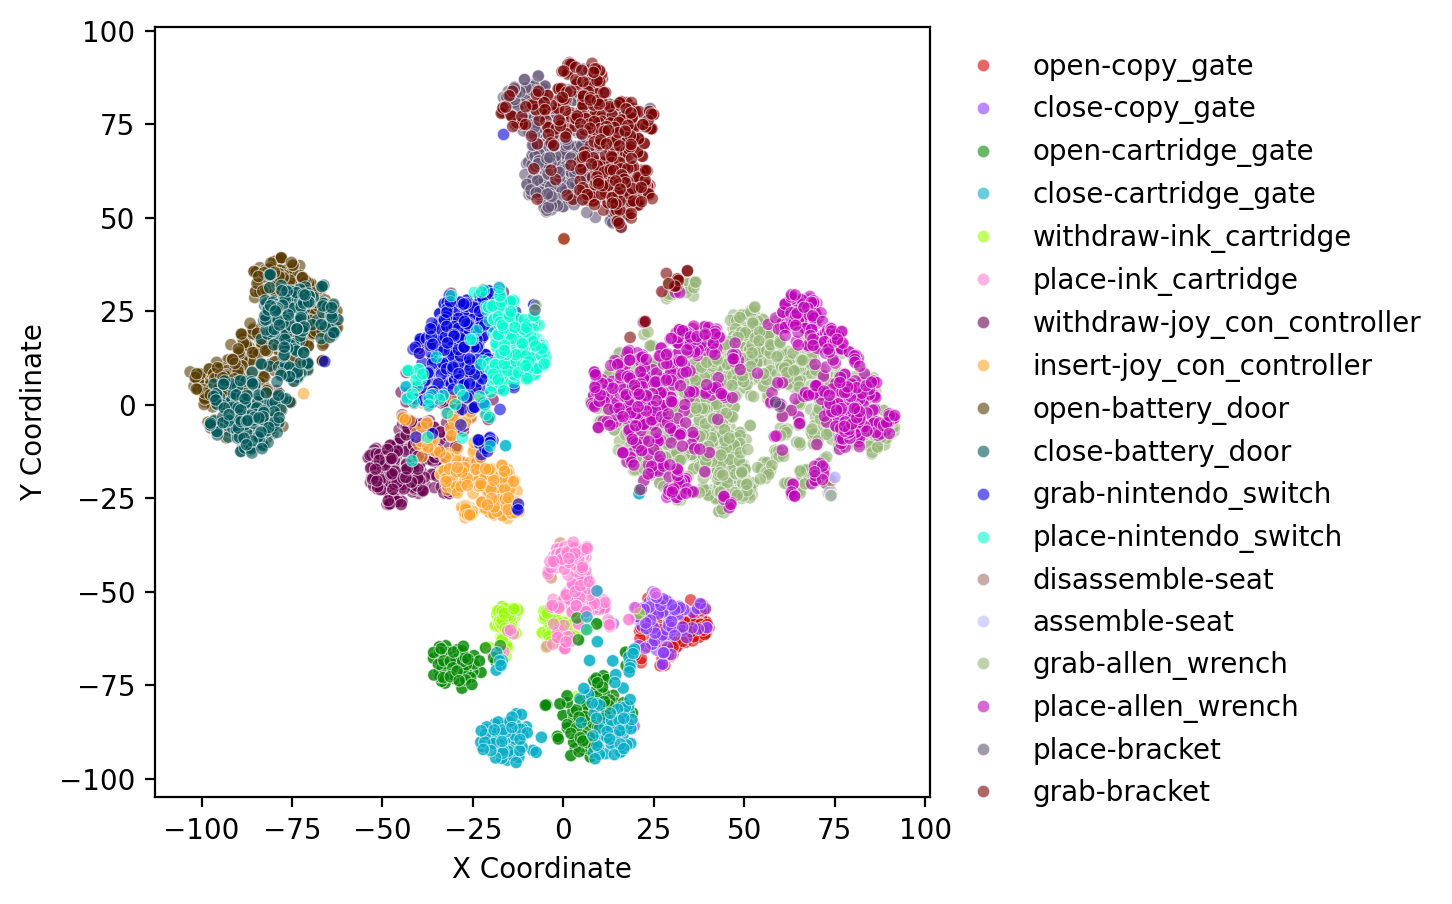

In [16]:
tsne_df = pd.DataFrame()
tsne_df["tsne_2d_one"] = tsne_results[:, 0]
tsne_df["tsne_2d_two"] = tsne_results[:, 1]
tsne_df["cluster"] = [id_to_action_name_dict[i] for i in selected_labels]

import colorcet as cc
palette = sns.color_palette(cc.glasbey, n_colors=len(np.unique(selected_labels)))

plt.figure(figsize=(5,5))
sns.scatterplot(
    x="tsne_2d_one",
    y="tsne_2d_two",
    hue="cluster",
    data=tsne_df,
    palette=palette,
    legend="full",
    alpha=0.6,
    s=20,
);

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend(bbox_to_anchor=(1,1), frameon=False);

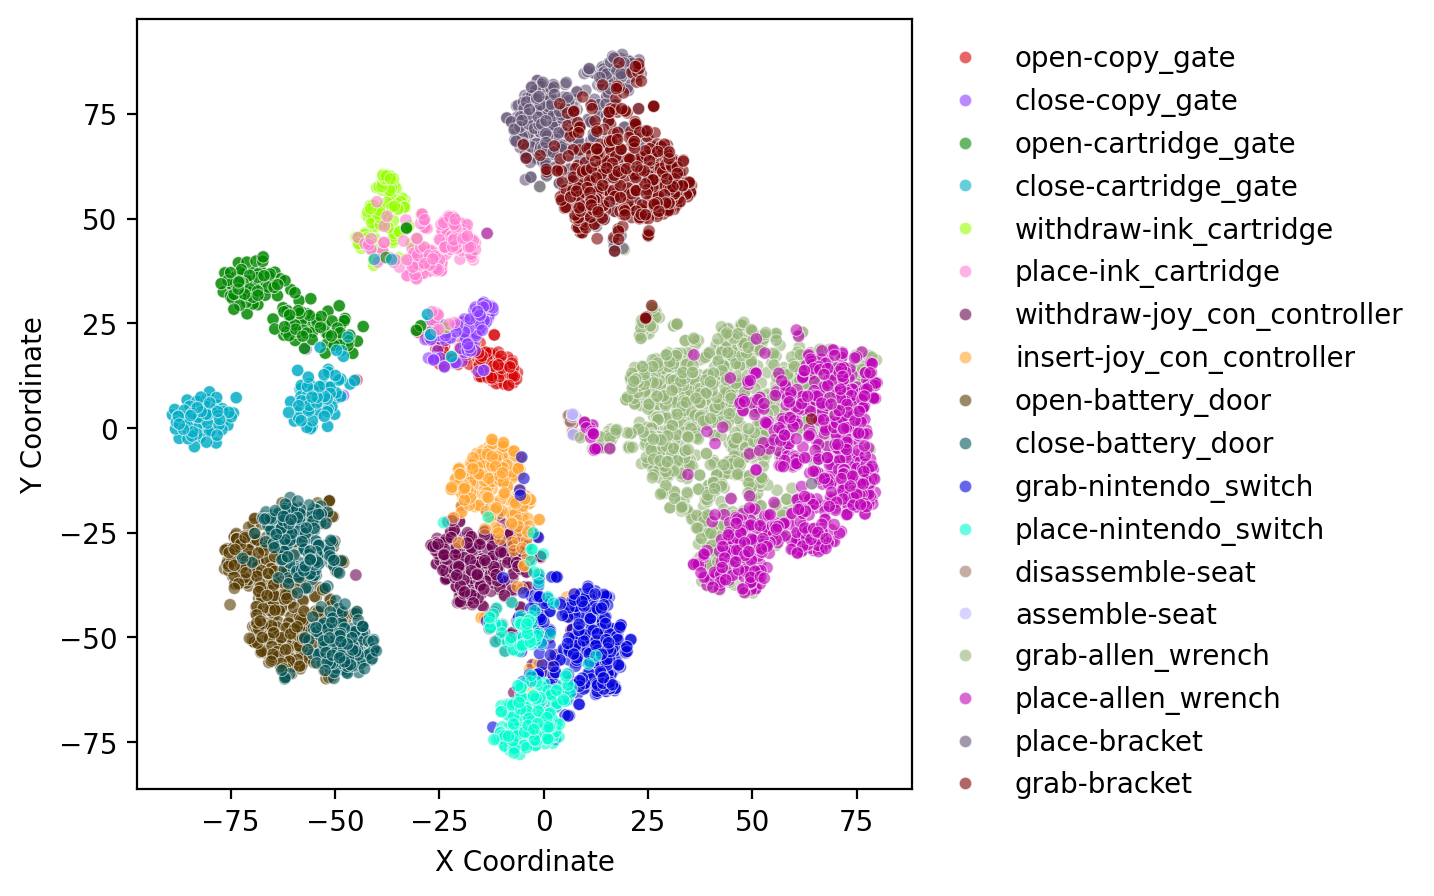

In [16]:
tsne_df = pd.DataFrame()
tsne_df["tsne_2d_one"] = tsne_results[:, 0]
tsne_df["tsne_2d_two"] = tsne_results[:, 1]
tsne_df["cluster"] = [id_to_action_name_dict[i] for i in selected_labels]

import colorcet as cc
palette = sns.color_palette(cc.glasbey, n_colors=len(np.unique(selected_labels)))

plt.figure(figsize=(5,5))
sns.scatterplot(
    x="tsne_2d_one",
    y="tsne_2d_two",
    hue="cluster",
    data=tsne_df,
    palette=palette,
    legend="full",
    alpha=0.6,
    s=20,
);

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend(bbox_to_anchor=(1,1), frameon=False);